# For Customer_Application Dataset

In [1]:
#Packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2.Extract Application_DataSet that contains information of customer at the time of application
app1=pd.read_csv("D:/Swati/UpGrad/Credit EDA Case Study-20211122T093717Z-001/Credit EDA Case Study/application_data.csv")
#preapp1=pd.read_csv("D:/Swati/UpGrad/Credit EDA Case Study-20211122T093717Z-001/Credit EDA Case Study/previous_application.csv")

In [3]:
#Number of Records#
app1.shape 

(307511, 122)

In [4]:
#Verify the Datatype if any conversion required.
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Missing Value Treatment

In [6]:
#Check for missing Values
missing_col=((app1.isnull().sum()/len(app1))*100).sort_values(ascending=False)
missing_col,missing_col.mean()

(COMMONAREA_MEDI                69.872297
 COMMONAREA_AVG                 69.872297
 COMMONAREA_MODE                69.872297
 NONLIVINGAPARTMENTS_MODE       69.432963
 NONLIVINGAPARTMENTS_MEDI       69.432963
                                  ...    
 REG_CITY_NOT_LIVE_CITY          0.000000
 LIVE_REGION_NOT_WORK_REGION     0.000000
 REG_REGION_NOT_WORK_REGION      0.000000
 HOUR_APPR_PROCESS_START         0.000000
 SK_ID_CURR                      0.000000
 Length: 122, dtype: float64,
 24.39594190712943)

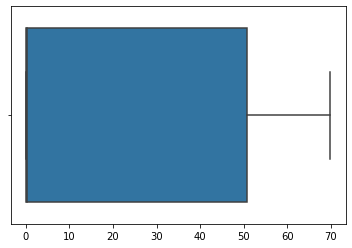

In [7]:
sns.boxplot(missing_col) # Since the avg missing values are 24% and max around 70%.Looking on the boxplot to check 
#the spread of missing values,we can delete columns with more than 40%

In [8]:
#Drop the columns having missing value more than 40%
cols_to_del=missing_col[missing_col>=40]
new_app1=app1.drop(cols_to_del.index,axis=1)
new_app1.shape

(307511, 73)

In [9]:
#Check for the columns with missing value less than 40%
missing_col=((new_app1.isnull().sum()/len(app1))*100).sort_values(ascending=False)
missing_col[missing_col>0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [10]:
#For missing value treatment,For numeric columns we can replace with mean and for categorical with mode.
#Seggregate the columns into numercial and cate gorical
num=new_app1._get_numeric_data().columns
cat=new_app1.select_dtypes(include=['object']).columns

In [11]:
#Replace mising numeric with median
for set in num:
    new_app1[set]=new_app1[set].fillna(new_app1[set].median())

#Replace missing categorical with mode
for set in cat:
    new_app1[set]=new_app1[set].fillna(new_app1[set].mode()[0])

In [12]:
#We see few of the missing values has been mentioned with XNA.Extract those columns.
xna_col=[]
for col in cat:
    for row in range (len(new_app1)):
        if new_app1[col][row]=='XNA':
            xna_col.append(col)
            break
        else:
            continue
xna_col

['CODE_GENDER', 'ORGANIZATION_TYPE']

In [13]:
#Check for XNA count and treat accordingly
new_app1.groupby('CODE_GENDER').CODE_GENDER.count() ##4,Can be replaced with mode()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [14]:
#Check for XNA count and treat accordingly
((new_app1.groupby('ORGANIZATION_TYPE').ORGANIZATION_TYPE.count()/len(new_app1))*100).sort_values(ascending=False).XNA
#Since less than 20%,so can be removed.

18.00716071945394

In [15]:
#Replace XNA with mode for Gender, and drop the rows for XNA ORGANIZATION_TYPE
new_app1['CODE_GENDER'].replace('XNA',new_app1['CODE_GENDER'].mode()[0],inplace=True)
new_app1['ORGANIZATION_TYPE'].replace('XNA',np.nan,inplace=True)
new_app2=new_app1.dropna(axis=0) 
new_app2.shape

(252137, 73)

In [16]:
#To Display all columns
pd.set_option('display.max_columns',73)
new_app2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003

In [17]:
#Few of the columns have negative values, negative values have columns starting with Days.
neg_col=[col for col in new_app2.columns if 'DAYS' in col]
neg_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [18]:
#Apply abs() to fix the negative value.
new_app2[neg_col]=abs(new_app2[neg_col])
new_app2[neg_col]

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
307504,16705.0,7258.0,9798.0,259.0,0.0
307506,9327.0,236.0,8456.0,1982.0,273.0
307508,14966.0,7921.0,6737.0,5150.0,1909.0
307509,11961.0,4786.0,2562.0,931.0,322.0


In [19]:
#Find the true numercial value.Under numericals there can be categorical,
#hence filtering out the true numericals having unique value more than 100.
true_num=[]
for i in num:
    if len(new_app1[i].unique())>100:
        true_num.append(i)
true_num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

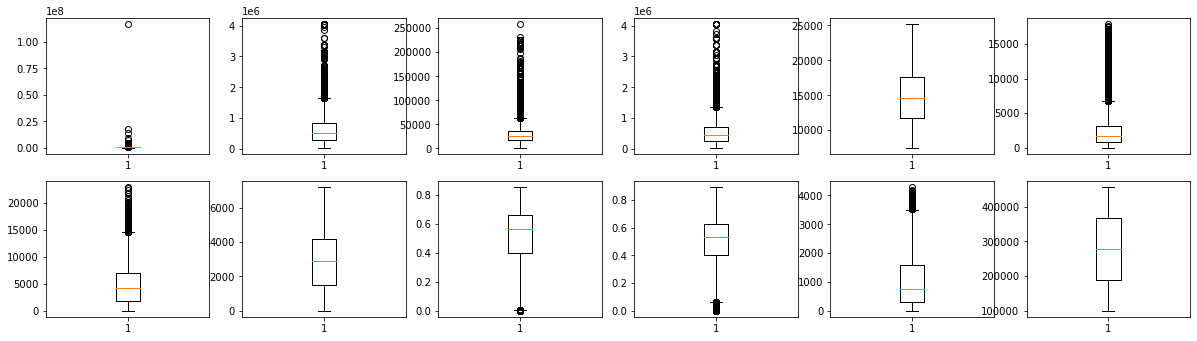

In [20]:
#TO check for outliers for the numeric columns obtained from the above .
fig, ax = plt.subplots(ncols=6, nrows=2)

income = ax[0][0].boxplot(new_app2['AMT_INCOME_TOTAL'])

cred = ax[0][1].boxplot(new_app2['AMT_CREDIT'])

annuity = ax[0][2].boxplot(new_app2['AMT_ANNUITY'])

price = ax[0][3].boxplot(new_app2['AMT_GOODS_PRICE'])

birth = ax[0][4].boxplot(new_app2['DAYS_BIRTH'])

emp = ax[0][5].boxplot(new_app2['DAYS_EMPLOYED'])

regi = ax[1][0].boxplot(new_app2['DAYS_REGISTRATION'])

pub = ax[1][1].boxplot(new_app2['DAYS_ID_PUBLISH'])

sor2 = ax[1][2].boxplot(new_app2['EXT_SOURCE_2'])

sor3 = ax[1][3].boxplot(new_app2['EXT_SOURCE_3'])

dlpc = ax[1][4].boxplot(new_app2['DAYS_LAST_PHONE_CHANGE'])

skid = ax[1][5].boxplot(new_app2['SK_ID_CURR'])
fig.set_size_inches(20.5, 5.5, forward=True)
plt.show()


##### From the above we can conclude except DAYS_BIRTH , DAYS_ID_PUBLISH and 'SK_ID_CURR, below columns are having outliers.
 AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE.Outliers can be treated using IQR.By replacing the max values with 70% IQR and min values with 25% IQR.

#### Data Imbalance

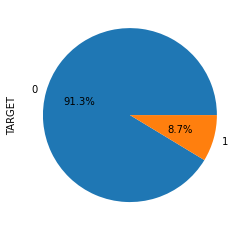

In [21]:
#To check for Data Imbalance based on Target columns.
((new_app2['TARGET'].value_counts()/len(new_app2))*100).plot.pie(autopct='%1.1f%%')

#### Since the ratio is nearly 91:9, the Data is highly imbalance.Hence we can analyse based on the data having TARGET value as 1.

In [22]:
#Since we need to analyse regarding the defaulters, dividing the dataset into 2 separate dataset to compare.
app_def=new_app2[new_app2['TARGET']==1]
app_non_def=new_app2[new_app2['TARGET']==0]

In [23]:
#To extract the categorical columns along with their unique value
mocat={i : len(new_app2[i].unique()) for i in cat}
mocat

{'NAME_CONTRACT_TYPE': 2,
 'CODE_GENDER': 2,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,
 'NAME_TYPE_SUITE': 7,
 'NAME_INCOME_TYPE': 7,
 'NAME_EDUCATION_TYPE': 5,
 'NAME_FAMILY_STATUS': 6,
 'NAME_HOUSING_TYPE': 6,
 'OCCUPATION_TYPE': 18,
 'WEEKDAY_APPR_PROCESS_START': 7,
 'ORGANIZATION_TYPE': 57}

#### For Univariate Analysis :

In [24]:
#Defining a function to plot bar chart for categorical variables.
def bplot(col,col1):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(27,10))
    sns.countplot(x=col,data=app_def,order=app_def[col].value_counts().index,ax=ax1)
    ax1.set_xlabel(col,fontsize=14)
    ax1.set_title(f'{col} Distribution for Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=14)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
    
    sns.countplot(x=col1,data=app_def,order=app_def[col1].value_counts().index,ax=ax2)
    ax2.set_xlabel(col1,fontsize=14)
    ax2.set_title(f'{col1} Distribution for Defaulters',fontsize=20)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20, ha="center",fontsize=14)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
   

    plt.show()

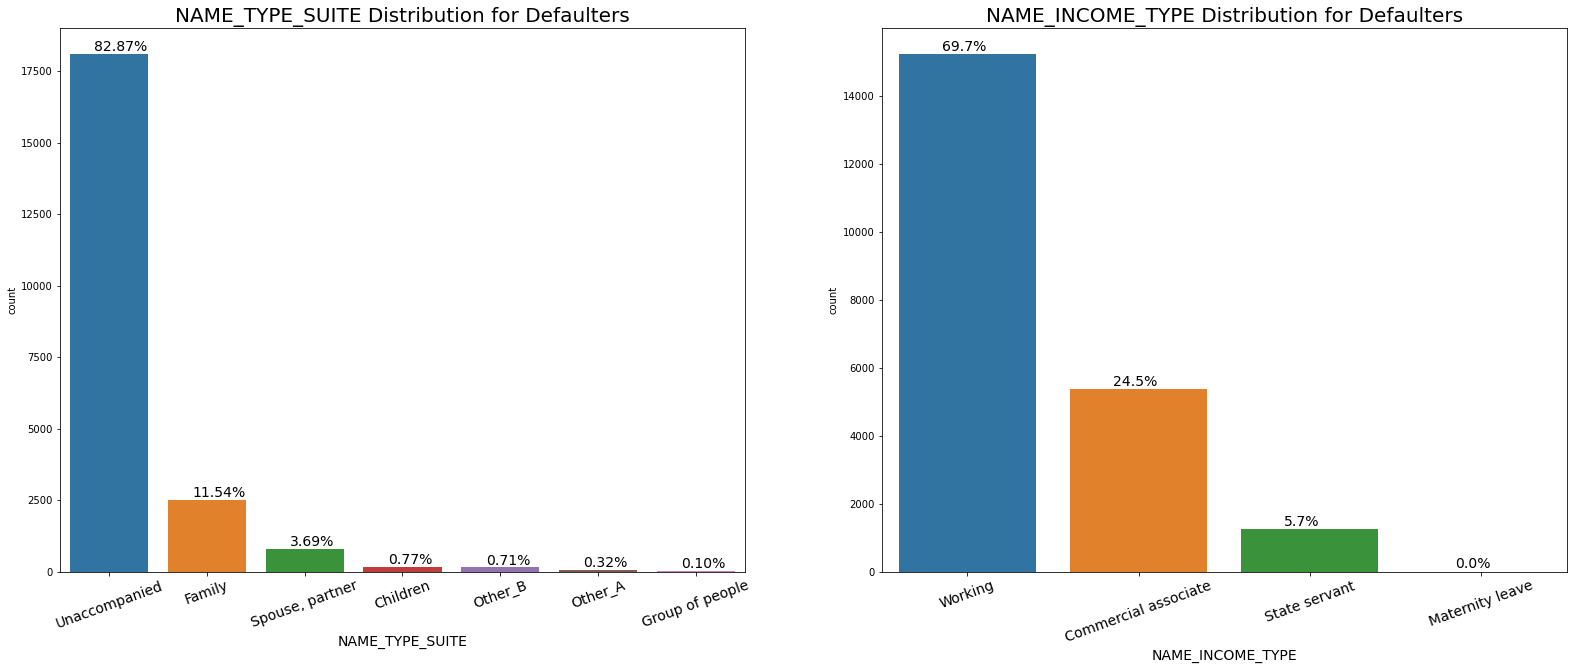

In [25]:
bplot('NAME_TYPE_SUITE','NAME_INCOME_TYPE')

#### For Suite Type as 'Unaccompanied' and for Income Type as 'Working' percentage of loan difficulties is higher

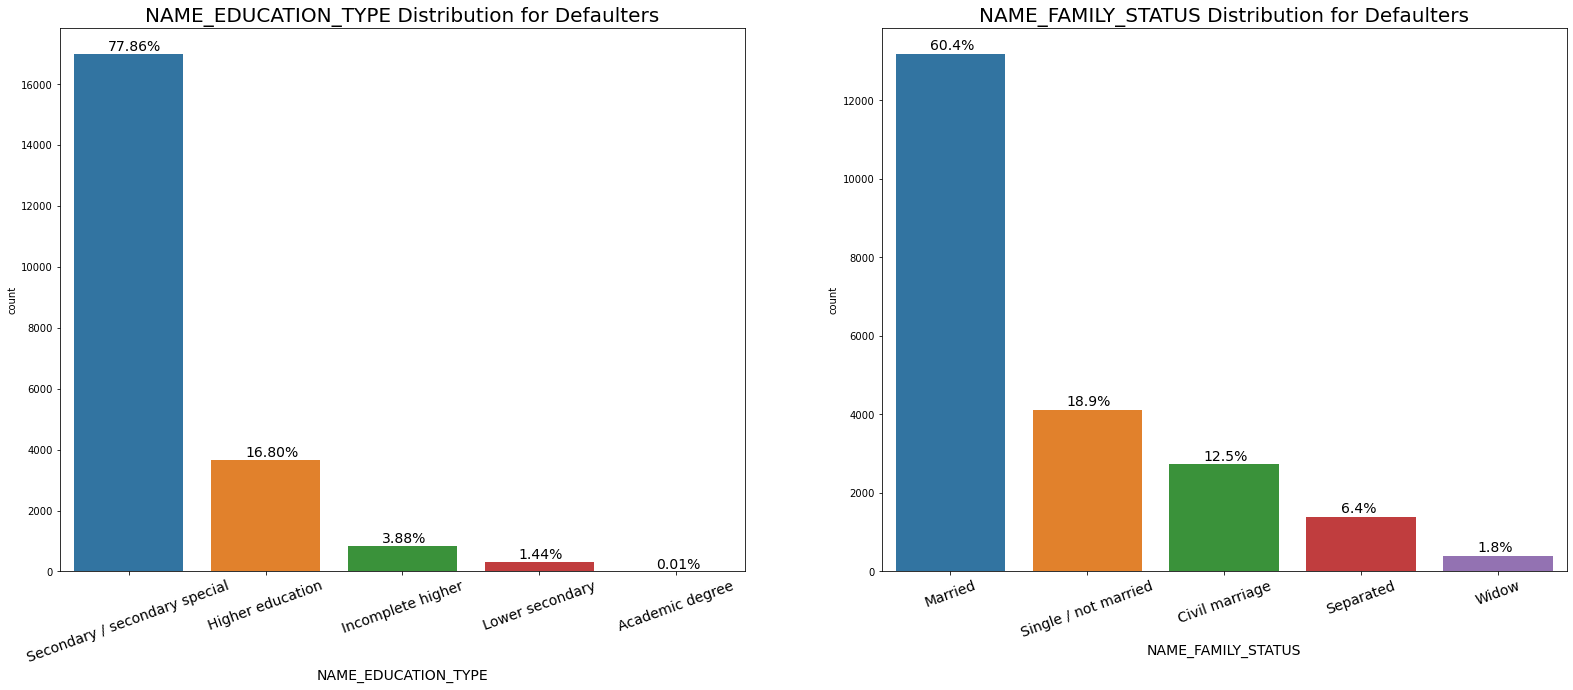

In [26]:
bplot('NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS')

#### For Education Type as 'Secondary' and for Family_Status Type as 'Married' , percentage of loan difficulties is higher.

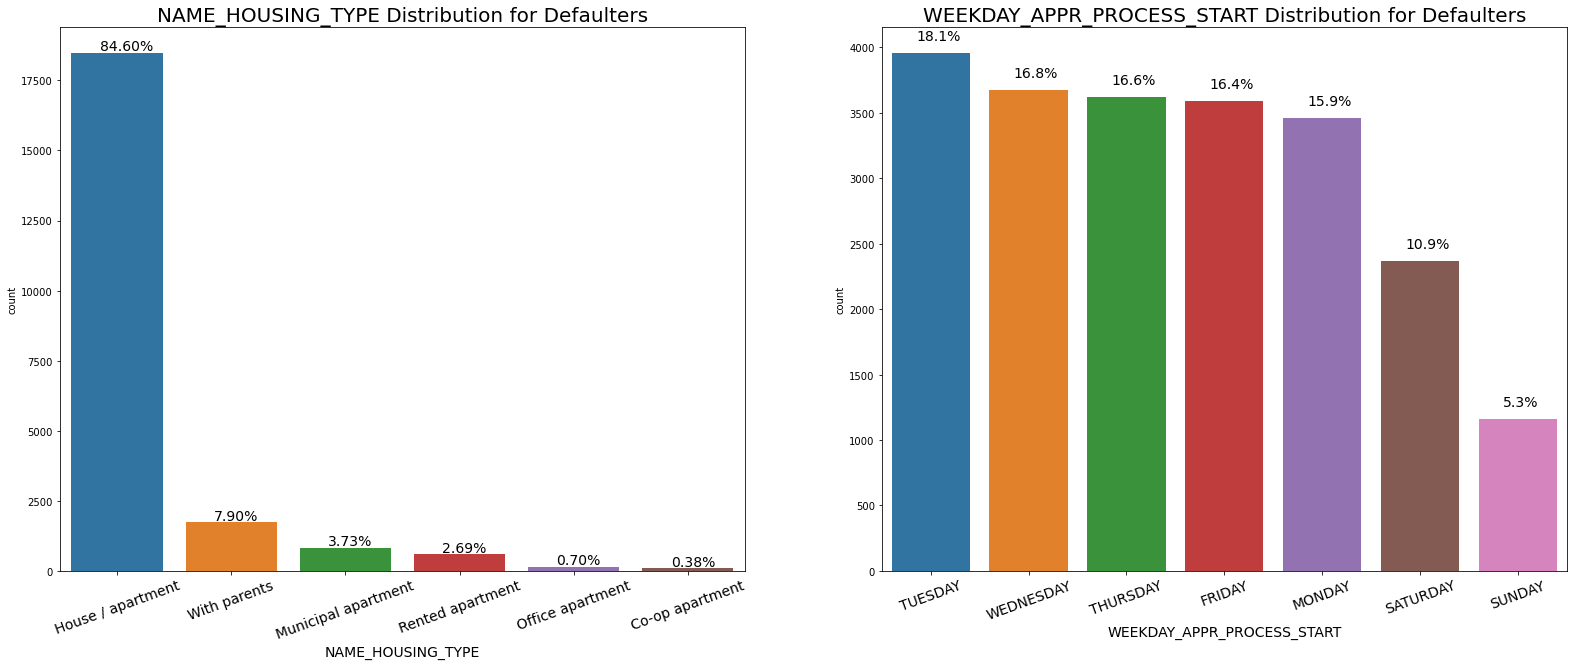

In [27]:
bplot('NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START')

#### For Housing Type as 'House/Apartment' and for application applied on 'Tuesday', percentage of loan difficulties is higher.

For binary Categorical variable, we can diplay the comparison via pie chart:
  NAME_CONTRACT_TYPE': 2,
 'CODE_GENDER': 2,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,

In [28]:
def pplot(col,col2):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(10,5))
    ax1 = plt.subplot2grid((1,2),(0,0))
    adef=(app_def.groupby(col)[col].count()/len(app_def))*100
    plt.pie(x=adef, autopct="%.1f%%",labels=adef.index, pctdistance=0.5)
    ax1.set_title(f'{col} Comparison for Defaulters',fontsize=10)
    
  
    ax2 = plt.subplot2grid((1,2),(0,1))
    ndef=(app_def.groupby(col2)[col2].count()/len(app_def))*100
    plt.pie(x=ndef, autopct="%.1f%%",labels=ndef.index, pctdistance=0.5)
    ax2.set_title(f'{col2} Comparison for Defaulters',fontsize=10)

    plt.show()

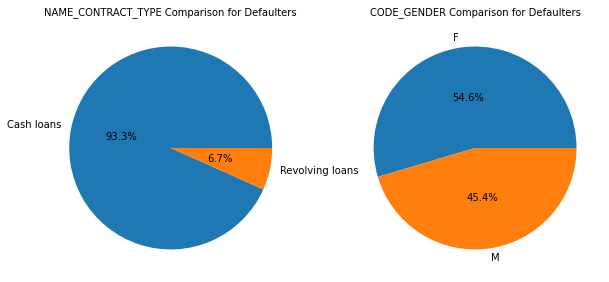

In [29]:
pplot('NAME_CONTRACT_TYPE','CODE_GENDER')

#### For Contract type as 'Cash Loan' and for Female, Percentage of loan difficulties is higher

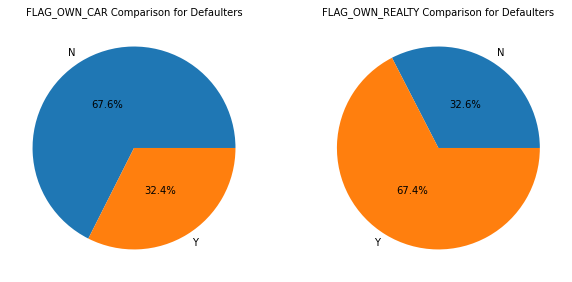

In [30]:
pplot('FLAG_OWN_CAR','FLAG_OWN_REALTY')

#### For a customer  NOT having  a car, or for a customer having a flat,percentage of loan difficulties is higher.

In [31]:
#For categorical columns having more than 7,taking the top 10 ,'OCCUPATION_TYPE': 18,'ORGANIZATION_TYPE': 57}
#Defining a function to plot bar chart for categorical variables.
def more_than_10_bplot(col,col2):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(37,12))
    sns.countplot(x=col,data=app_def,order=app_def[col].value_counts().head(10).index,ax=ax1)
    ax1.set_xlabel(col,fontsize=14)
    ax1.set_title(f'{col} Distribution for Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=15)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=15)
    
    sns.countplot(x=col2,data=app_def,order=app_def[col2].value_counts().head(10).index,ax=ax2)
    ax2.set_xlabel(col2,fontsize=14)
    ax2.set_title(f'{col2} Distribution for Defaulters',fontsize=20)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20, ha="center",fontsize=15)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=15)
   

    plt.show()

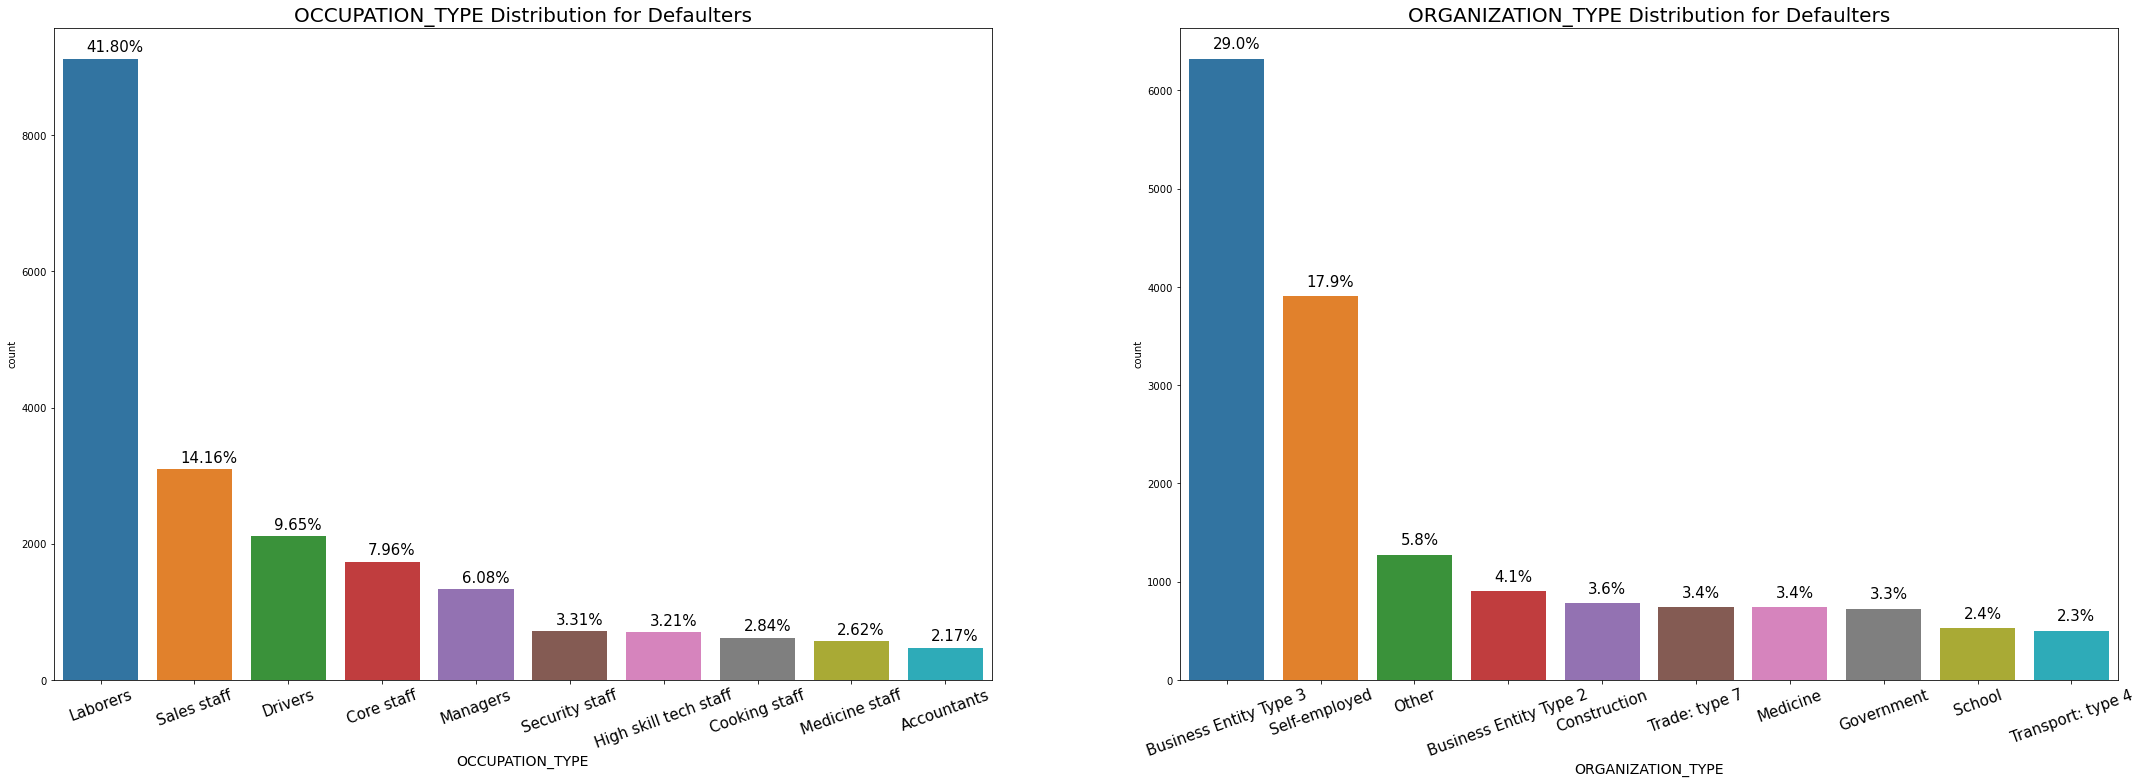

In [32]:
more_than_10_bplot('OCCUPATION_TYPE','ORGANIZATION_TYPE')

#### For Occupation types as 'Labourers and for organization type as 'Business Ent-3',percentage of Loan difficulties is higher

### To find top 10 correlation

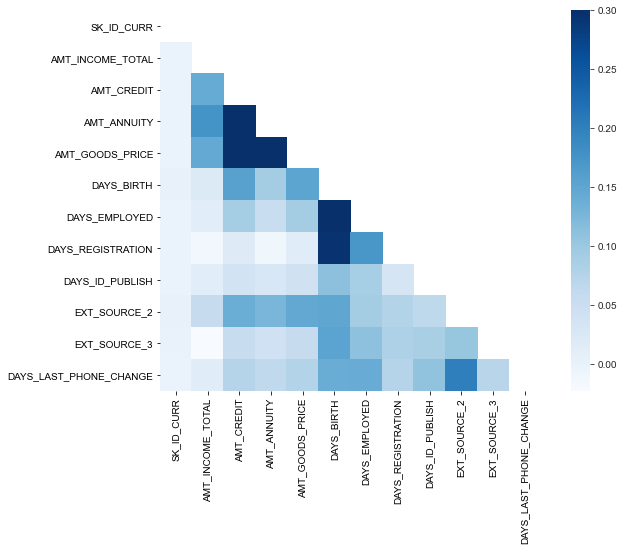

In [33]:
#Using Heatmap to find to correlation
corr = new_app2[true_num].corr()
msk = np.zeros_like(corr)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,7))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=msk, vmax=0.3, square=True,cmap = "Blues")
    plt.show()

In [34]:
#Extracting the top 10 correlated variables
corr1 = new_app2[true_num].corr().abs().unstack().sort_values(ascending=False).dropna()
corr1[corr1 !=1.0].head(20)

AMT_GOODS_PRICE         AMT_CREDIT                0.986191
AMT_CREDIT              AMT_GOODS_PRICE           0.986191
AMT_GOODS_PRICE         AMT_ANNUITY               0.765439
AMT_ANNUITY             AMT_GOODS_PRICE           0.765439
                        AMT_CREDIT                0.761294
AMT_CREDIT              AMT_ANNUITY               0.761294
DAYS_EMPLOYED           DAYS_BIRTH                0.352321
DAYS_BIRTH              DAYS_EMPLOYED             0.352321
                        DAYS_REGISTRATION         0.295930
DAYS_REGISTRATION       DAYS_BIRTH                0.295930
EXT_SOURCE_2            DAYS_LAST_PHONE_CHANGE    0.201864
DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_2              0.201864
AMT_ANNUITY             AMT_INCOME_TOTAL          0.175383
AMT_INCOME_TOTAL        AMT_ANNUITY               0.175383
DAYS_EMPLOYED           DAYS_REGISTRATION         0.171754
DAYS_REGISTRATION       DAYS_EMPLOYED             0.171754
AMT_CREDIT              DAYS_BIRTH                0.1574

In [35]:
#Scatter plot for top 10 correlated variables
def splot(col1,col2,col3,col4):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(16,5))
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.scatter(app_def[col1],app_def[col2])
    ax1.set_ylabel(col2, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    ax1.set_xlabel(col1, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    ax1.set_title(f'{col1} Vs {col2}',fontsize=12)
    
    ax2 = plt.subplot2grid((1,2),(0,1))
    plt.scatter(app_def[col3],app_def[col4])
    ax2.set_ylabel(col4, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    ax2.set_xlabel(col3, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    ax2.set_title(f'{col3} Vs {col4}',fontsize=12)
    
    plt.show()

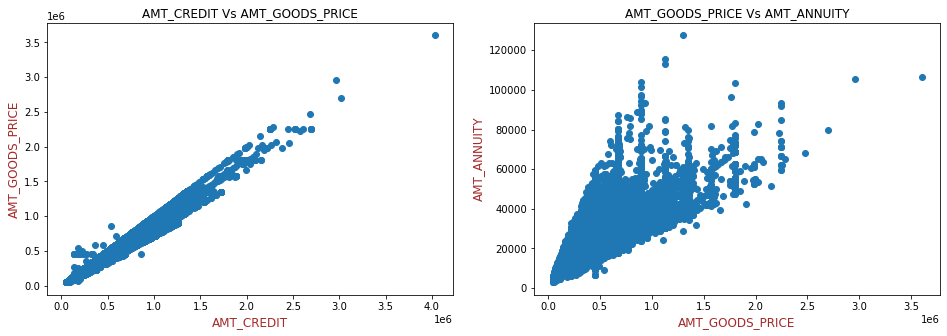

In [36]:
splot('AMT_CREDIT','AMT_GOODS_PRICE','AMT_GOODS_PRICE','AMT_ANNUITY')

####  The current credit amount increases with the increase of previous credit amount.Also with increase of previous credit amount,loan annuity increases

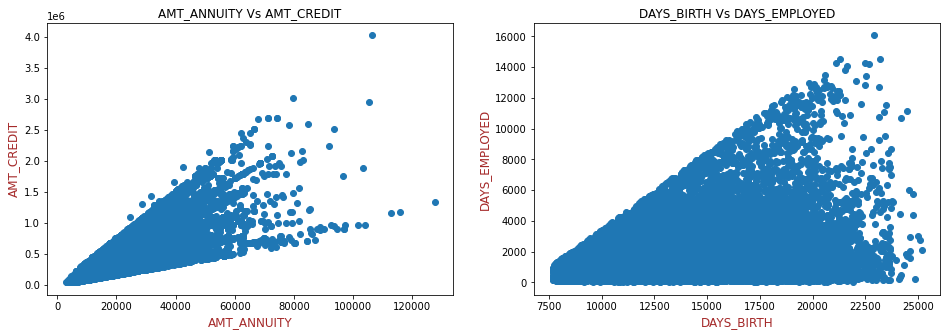

In [37]:
splot('AMT_ANNUITY','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED',) 

#### With increase of current credit amount,loan annuity increases.Also higher is the age,current employment day is higher.

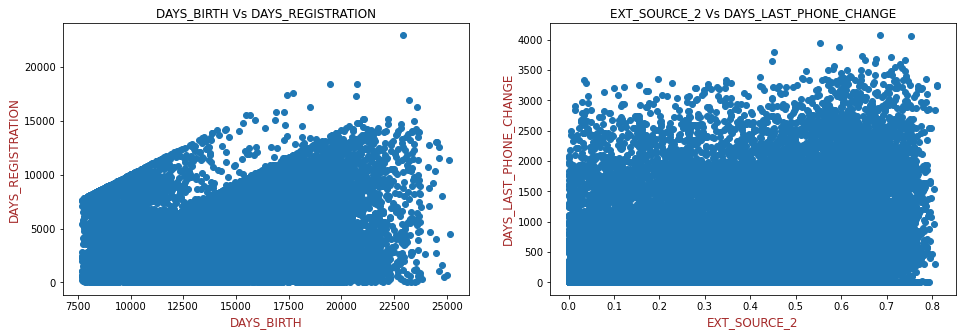

In [38]:
splot('DAYS_BIRTH','DAYS_REGISTRATION','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE') 

#### Higher is the age,Registration Days is also higher.Also the ext source-2 and days last phone change are positively correlated.

### To analyse the distribution for numerical variables using bining.

In [39]:
def bining_plot(col,col2):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(25,7))
    label=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']
    
    adef= pd.qcut(app_def[col], q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=label).value_counts()
    sns.barplot(label,adef,ax=ax1)
    ax1.set_title(f'For {col}',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=10)
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
    
    ndef= pd.qcut(app_def[col2], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=label).value_counts()
    sns.barplot(label,ndef,ax=ax2)
    ax2.set_title(f'For {col2}',fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20,ha="center",fontsize=10)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
   

    plt.show()

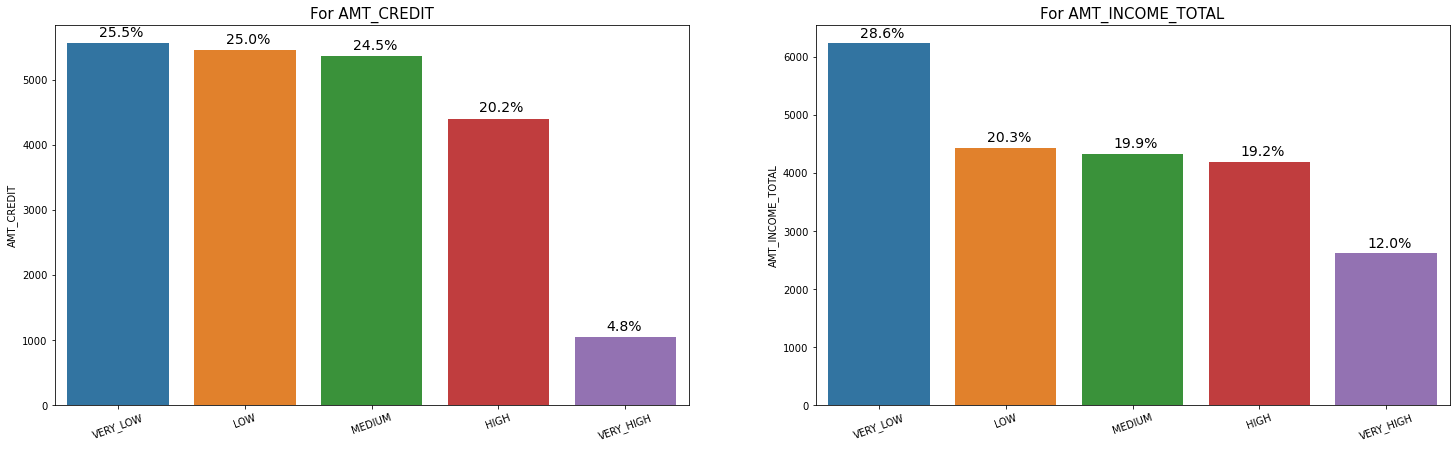

In [40]:
bining_plot('AMT_CREDIT','AMT_INCOME_TOTAL')

#### Lower the Credit amount or lower the Income,  more % of Loan Difficulties.

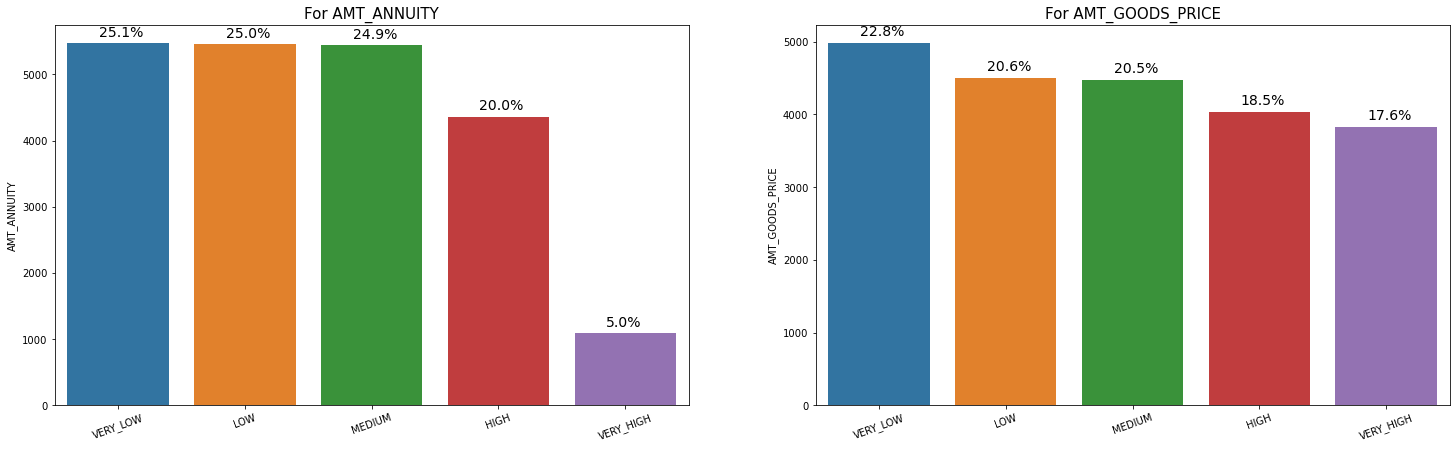

In [41]:
bining_plot('AMT_ANNUITY','AMT_GOODS_PRICE')

#### Even Lower the Annuity or lower the previous credit amount, more in the difficulty %.

### To perform Bivariate Analyses

In [42]:
#Defining a function to plot bar chart for Bivariate variables.
def biplot(col1,col2,col3):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(26,6))
    sns.countplot(data = app_def, x=col1,order=app_def[col1].value_counts().index,hue =col2,ax=ax1)
    ax1.set_xlabel(col1,fontsize=13)
    #ax1.set_title(f'% of Loan Difficulties having {t1}',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20 ,ha="center",fontsize=15)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.15, p.get_height()+100),fontsize=13)
    
    sns.countplot(data = app_def, x=col1,order=app_def[col1].value_counts().index,hue =col3,ax=ax2)
    ax2.set_xlabel(col1,fontsize=13)
    #ax2.set_title(f'% of Loan Difficulties having {t2}',fontsize=15)
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=20,ha="center",fontsize=15)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_non_def))*100), (p.get_x()+0.15, p.get_height()+100),fontsize=13)
   

    plt.show()

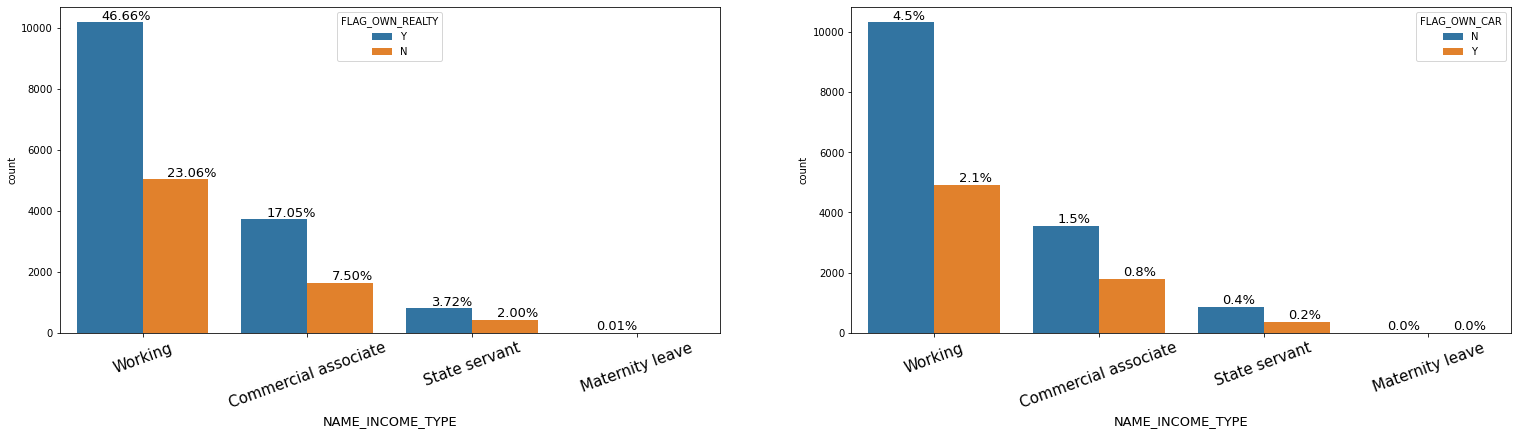

In [43]:
biplot('NAME_INCOME_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR')

#### 'Working' Income Type having flat or 'Working' Type not owing a car have more loan difficulties.

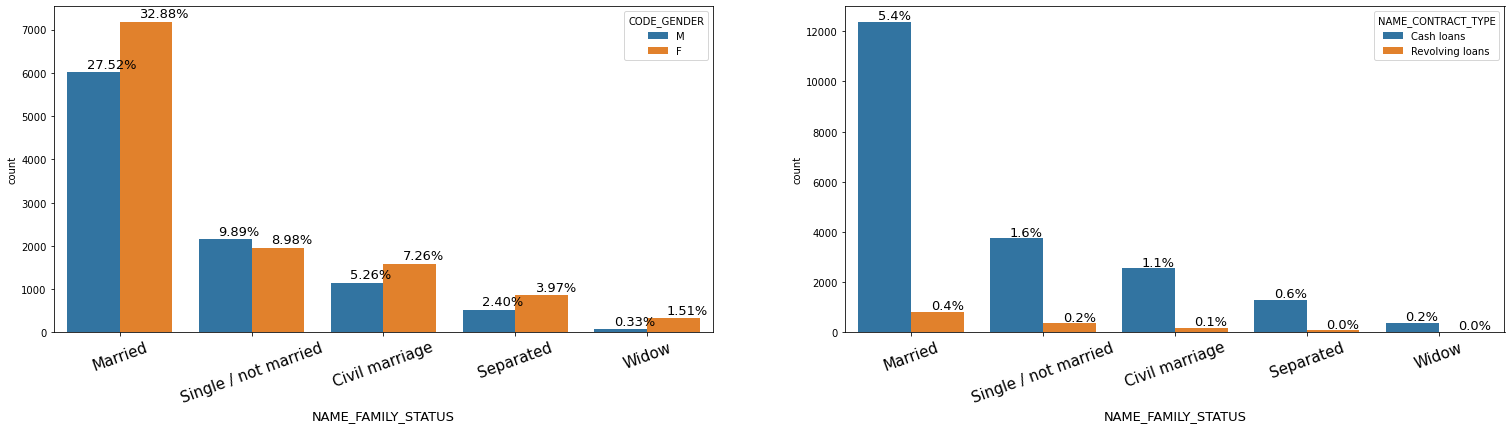

In [44]:
biplot('NAME_FAMILY_STATUS','CODE_GENDER','NAME_CONTRACT_TYPE')

#### Female Married applicant or Married applicant with contract type as 'Cash Loan' have more % of loan difficulties.

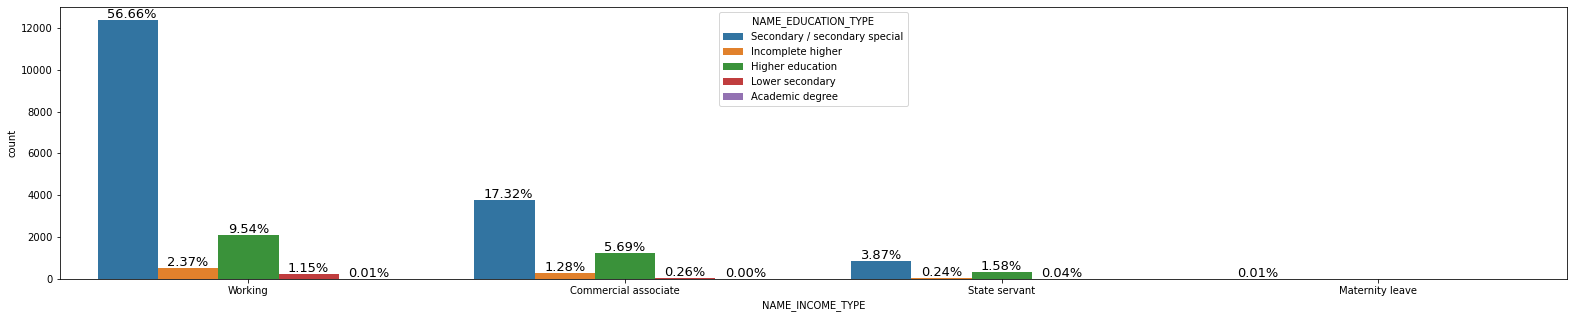

In [45]:
#biplot('NAME_INCOME_TYPE' Vs 'NAME_EDUCATION_TYPE')
plt.figure(figsize=[27,5])
ax=sns.countplot(data = app_def, x='NAME_INCOME_TYPE',order=app_def['NAME_INCOME_TYPE'].value_counts().index,hue ='NAME_EDUCATION_TYPE')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.025, p.get_height()+100),fontsize=13)

#### Working Applicant woth secondary education have more difficulties in loan payment.

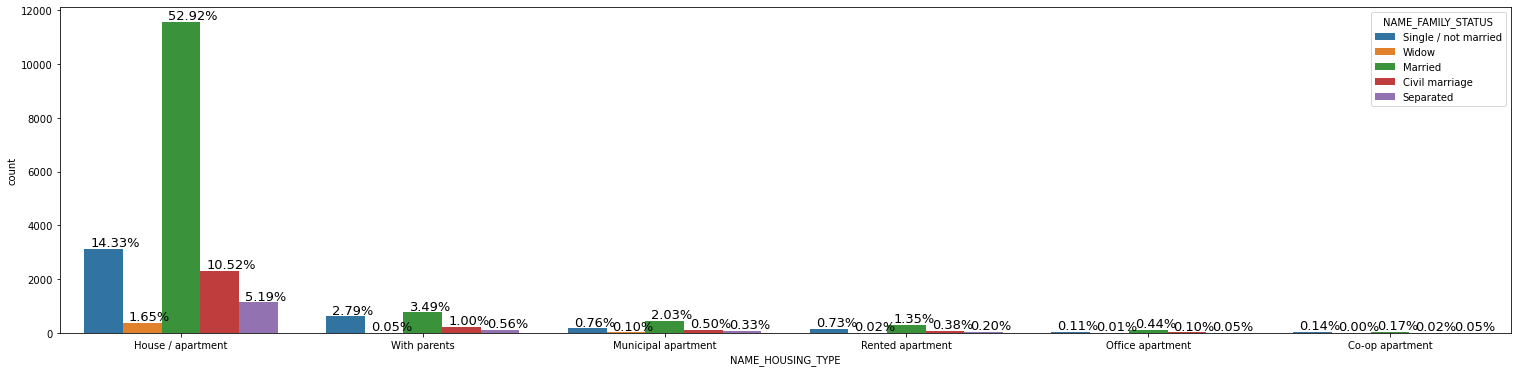

In [46]:
#biplot('NAME_HOUSING_TYPE  ' Vs 'NAME_FAMILY_STATUS ')
plt.figure(figsize=[26,6])
ax=sns.countplot(data = app_def, x='NAME_HOUSING_TYPE',order=app_def['NAME_HOUSING_TYPE'].value_counts().index,hue ='NAME_FAMILY_STATUS')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.025, p.get_height()+100),fontsize=13)

#### Married applicant with House/Apartment have more loan difficulties.

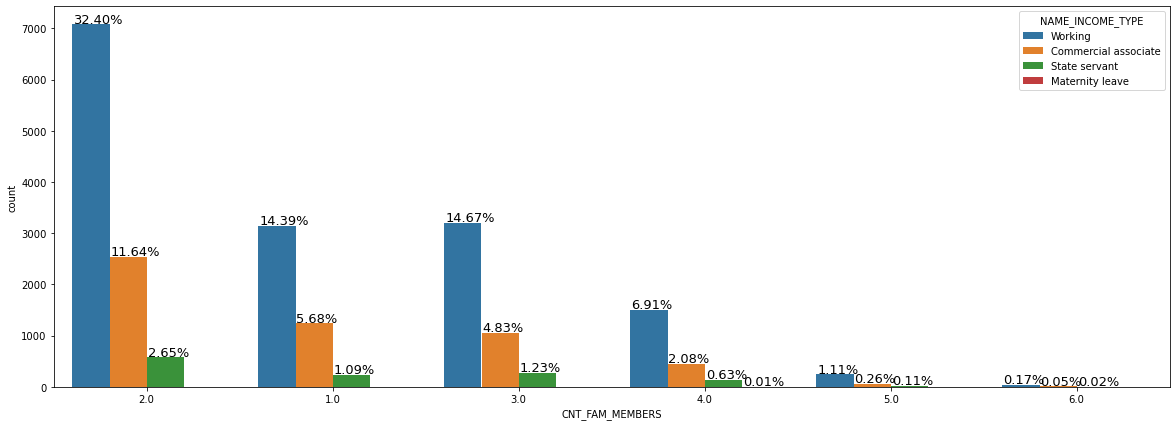

In [47]:
#biplot('OCCUPATION_TYPE' Vs 'NAME_HOUSING_TYPE ')
plt.figure(figsize=[20,7])
ax=sns.countplot(data = app_def, x='CNT_FAM_MEMBERS',order=app_def['CNT_FAM_MEMBERS'].value_counts().head(6).index,hue ='NAME_INCOME_TYPE')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/len(app_def))*100), (p.get_x()+0.005, p.get_height()+30),fontsize=13)

#### Family members with a count of 2 and is working face more loan difficulties.